# Importing Necessary Libraries

In [7]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

# Extracting our dataframe specific to our job roles and location!!

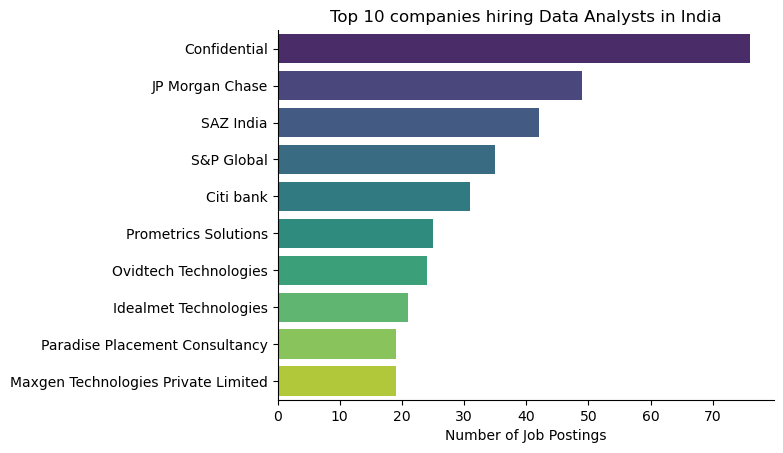

In [37]:
df_DA_india = df[(df['job_title_short'] == 'Data Analyst') & (df['job_location'] == 'India')].copy()

df_plot = df_DA_india['company_name'].value_counts().head(10).to_frame()
sns.barplot(data = df_plot, x='count', y='company_name', palette='viridis', hue='company_name', legend=False)
sns.despine()

plt.title('Top 10 companies hiring Data Analysts in India')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()



# Preview Of Our Data Frame

In [38]:
df_DA_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
691,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-09-12 13:14:38,True,False,India,None,NaN,NaN,AOS,None,None
963,Data Analyst,Data Analyst Intern,India,via BeBee India,Internship,False,India,2023-12-25 13:20:23,False,False,India,None,NaN,NaN,Elitemet Solutions,None,None
1336,Data Analyst,Junior CRM/Retention Data Analyst,India,via Jooble,Full-time,False,India,2023-10-30 13:08:55,False,False,India,None,NaN,NaN,Boston Link,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782917,Data Analyst,Data Analyst responsibilities,India,via LinkedIn,Full-time,False,India,2023-01-28 06:13:21,True,False,India,None,NaN,NaN,Nitinkumar Dindayal Patle,None,None
784121,Data Analyst,Data Analyst,India,via LinkedIn,Full-time,False,India,2023-01-20 06:52:15,False,False,India,None,NaN,NaN,Deevia Software India Private Limited,[python],{'programming': ['python']}
784307,Data Analyst,Data Analyst,India,via Shine,Full-time,False,India,2023-12-31 06:06:15,False,False,India,None,NaN,NaN,Digital Patron,"[sql, mysql]","{'databases': ['mysql'], 'programming': ['sql']}"
785181,Data Analyst,Data Privacy Analyst,India,via LinkedIn,Full-time,False,India,2023-01-27 06:13:30,True,False,India,None,NaN,NaN,Virtusa,None,None


# Exploring Job Perks Distribution

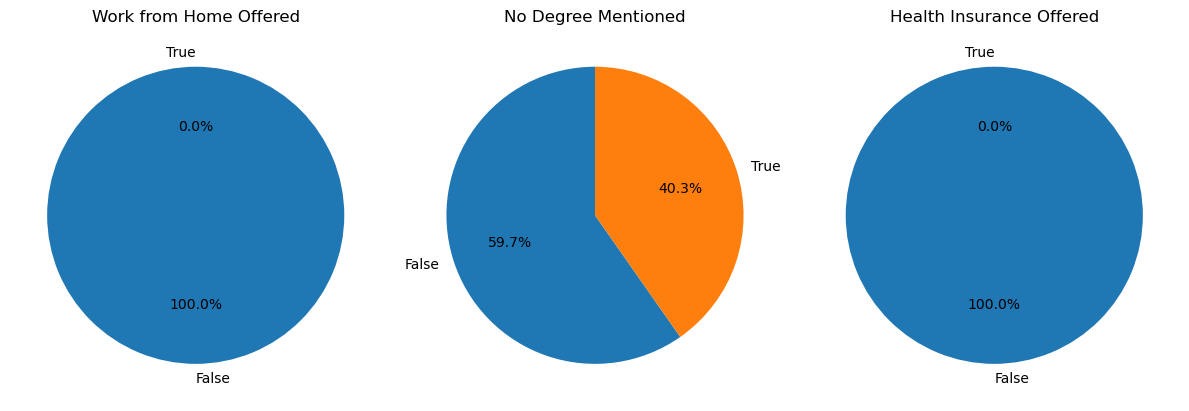

In [44]:
df_DA_india[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12,5)

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Mentioned',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    # Ensure both False and True are present in the counts
    counts = df_DA_india[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(counts, autopct='%1.1f%%', startangle=90, labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()
  

# Top 10 Sources for Data Analyst Job Postings in India

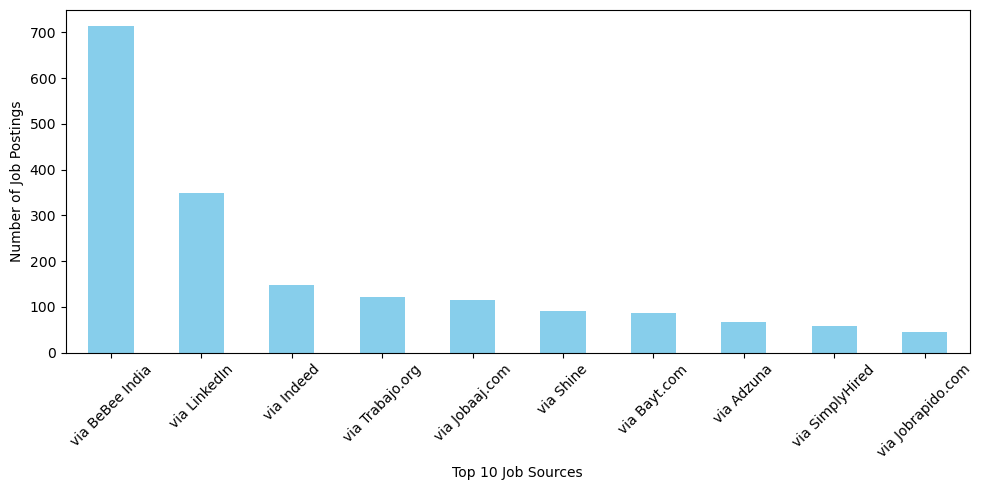

In [52]:
df_DA_india['job_via'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Top 10 Job Sources')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()